Source: http://cs.brown.edu/~pavlo/stocks/
http://nbviewer.ipython.org/github/twiecki/financial-analysis-python-tutorial/blob/master/1.%20Pandas%20Basics.ipynb

In [1]:
import datetime

import pandas as pd
from pandas import Series
import pandas.io.data
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('IBM.csv', index_col=0, parse_dates=True)

In [4]:
df.head(15)

,DATE,PRICE,OPEN,LOW,HIGH
1970-01-02,364.750,15800,0,0,0
1970-01-05,368.250,21200,0,0,0
1970-01-06,368.500,24400,0,0,0
1970-01-07,368.750,22900,0,0,0
1970-01-08,369.500,35400,0,0,0
1970-01-09,369.000,29300,0,0,0
1970-01-12,367.750,19000,0,0,0
1970-01-13,374.125,37200,0,0,0
1970-01-14,373.750,19600,0,0,0
1970-01-15,381.500,21100,0,0,0


In [5]:
price = df['PRICE']

In [7]:
price.describe()

count        9331.000000
mean      2531937.970207
std       3192389.702898
min             0.000000
25%        171250.000000
50%       1383000.000000
75%       3744750.000000
max      69444800.000000
Name: PRICE, dtype: float64

In [45]:
price.var(), price.var()**(1/2.0), price.std()

(6648649382378.1963, 2578497.5048229531, 2578497.5048229531)

In [8]:
price = price.tail(500)

In [46]:
price.tail(10)

2006-12-15    8086500
2006-12-18    7984900
2006-12-19    4933200
2006-12-20    3713200
2006-12-21    4406200
2006-12-22    3031500
2006-12-26    2278700
2006-12-27    4571800
2006-12-28    4501900
2006-12-29    4455900
Name: PRICE, dtype: int64

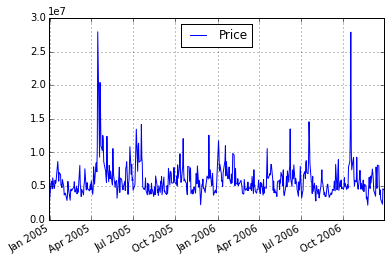

In [14]:
price.plot(label='Price', legend='Stock market data')

In [15]:
mavg = pd.rolling_mean(price, 40)

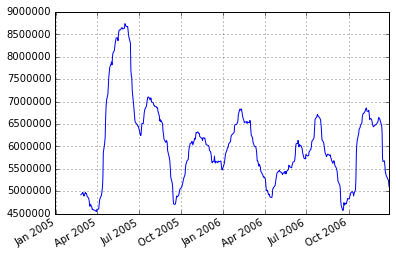

In [17]:
mavg.plot()

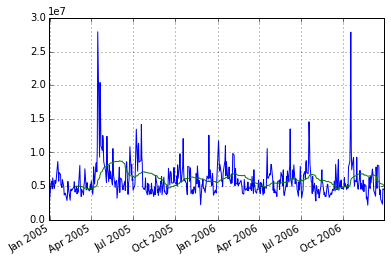

In [18]:
price.plot()
mavg.plot()

In [19]:
labels = ['a', 'b', 'c', 'd', 'e']

In [20]:
Series([1, 2, 3, 4, 5], index=labels)

a    1
b    2
c    3
d    4
e    5
dtype: int64

In [21]:
'a' in labels

True

In [47]:
aapl = pd.io.data.get_data_yahoo('AAPL', 
                                 start=datetime.datetime(2014, 10, 1), 
                                 end=datetime.datetime(2015, 5, 1))
aapl.tail()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2015-04-27,132.31000,133.13000,131.14999,132.64999,96954200,132.09821
2015-04-28,134.46001,134.53999,129.57001,130.56000,118924000,130.01691
2015-04-29,130.16000,131.59000,128.30000,128.64000,63386100,128.10490
2015-04-30,128.64000,128.64000,124.58000,125.15000,83195400,124.62942
2015-05-01,126.10000,130.13000,125.30000,128.95000,58512600,128.41360


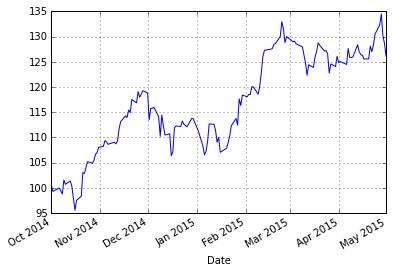

In [48]:
aapl['Open'].plot(label='Open')

In [52]:
ts = aapl['Close']

In [53]:
type(ts)

pandas.core.series.Series

In [54]:
ts.index

<class 'pandas.tseries.index.DatetimeIndex'>
[2014-10-01, ..., 2015-05-01]
Length: 147, Freq: None, Timezone: None

In [55]:
ts.index[0]

Timestamp('2014-10-01 00:00:00')

In [56]:
aapl['diff'] = aapl.Open - aapl.Close

In [57]:
aapl.tail()

,Open,High,Low,Close,Volume,Adj Close,diff
Date,,,,,,,
2015-04-27,132.31000,133.13000,131.14999,132.64999,96954200,132.09821,-0.33999
2015-04-28,134.46001,134.53999,129.57001,130.56000,118924000,130.01691,3.90001
2015-04-29,130.16000,131.59000,128.30000,128.64000,63386100,128.10490,1.52000
2015-04-30,128.64000,128.64000,124.58000,125.15000,83195400,124.62942,3.49000
2015-05-01,126.10000,130.13000,125.30000,128.95000,58512600,128.41360,-2.85000


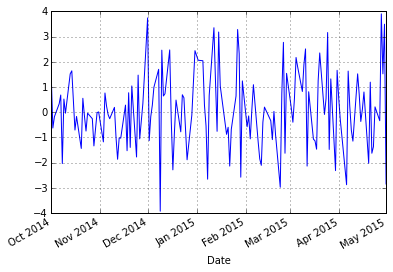

In [58]:
aapl['diff'].plot()

In [59]:
stocks = pd.io.data.get_data_yahoo(['AAPL', 'GE', 'GOOG', 'IBM', 'KO', 'MSFT', 'PEP'], 
                               start=datetime.datetime(2014, 1, 1), 
                               end=datetime.datetime(2015, 1, 1))['Adj Close']
stocks.head()

,AAPL,GE,GOOG,IBM,KO,MSFT,PEP
Date,,,,,,,
2014-01-02,76.76505,26.32030,NaN,178.51933,39.15192,35.91400,79.28928
2014-01-03,75.07884,26.30116,NaN,179.58739,38.95934,35.67238,79.42449
2014-01-06,75.48826,26.09060,NaN,178.97157,38.77639,34.91853,79.46313
2014-01-07,74.94838,26.11931,NaN,182.54138,38.89194,35.18914,80.62205
2014-01-08,75.42302,26.04274,NaN,180.86713,38.45863,34.56094,80.39026


In [60]:
rets = stocks.pct_change()
rets.head()

,AAPL,GE,GOOG,IBM,KO,MSFT,PEP
Date,,,,,,,
2014-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-01-03,-0.021966,-0.000727,NaN,0.005983,-0.004919,-0.006728,0.001705
2014-01-06,0.005453,-0.008006,NaN,-0.003429,-0.004696,-0.021133,0.000486
2014-01-07,-0.007152,0.001100,NaN,0.019946,0.002980,0.007750,0.014584
2014-01-08,0.006333,-0.002932,NaN,-0.009172,-0.011141,-0.017852,-0.002875


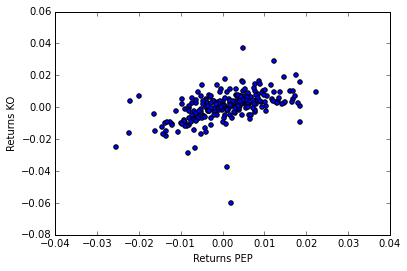

In [61]:
plt.scatter(rets.PEP, rets.KO)
plt.xlabel('Returns PEP')
plt.ylabel('Returns KO')

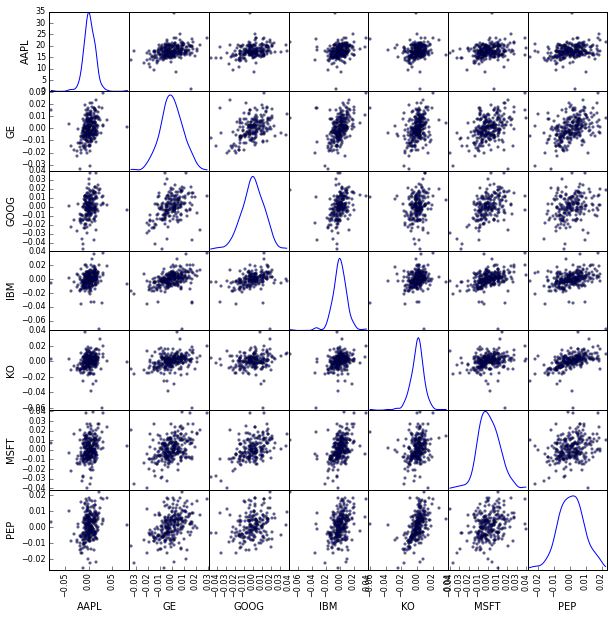

In [62]:
pd.scatter_matrix(rets, diagonal='kde', figsize=(10, 10));

In [63]:
corr = rets.corr()
corr

,AAPL,GE,GOOG,IBM,KO,MSFT,PEP
AAPL,1.000000,0.321124,0.324053,0.178247,0.120582,0.235004,0.251237
GE,0.321124,1.000000,0.382543,0.410422,0.262478,0.421004,0.417179
GOOG,0.324053,0.382543,1.000000,0.316642,0.157761,0.481799,0.260634
IBM,0.178247,0.410422,0.316642,1.000000,0.260810,0.385984,0.262154
KO,0.120582,0.262478,0.157761,0.260810,1.000000,0.215464,0.506374
MSFT,0.235004,0.421004,0.481799,0.385984,0.215464,1.000000,0.286182
PEP,0.251237,0.417179,0.260634,0.262154,0.506374,0.286182,1.000000


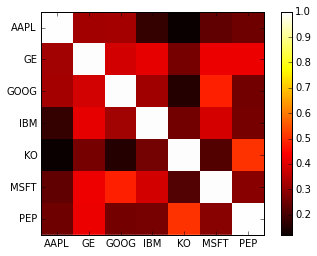

In [64]:
plt.imshow(corr, cmap='hot', interpolation='none')
plt.colorbar()
plt.xticks(range(len(corr)), corr.columns)
plt.yticks(range(len(corr)), corr.columns);